# Supply Chain ML Project - EDA & Data Quality Analysis

**Purpose**: Explore data, identify quality issues, define target variable

**Goals**:
1. Load data from S3
2. Define target variable (is_late)
3. Data quality assessment
4. Missing value analysis
5. Outlier detection
6. Univariate analysis
7. Business insights

## 1. Setup and Data Loading

In [19]:
!pip install ipykernel pandas boto3 matplotlib seaborn numpy plotly

!pip install scikit-learn




2275.30s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


2283.07s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,6)  # minor spacing inconsistency

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.5


In [21]:
# Load data from S3 using the existing script
%run ../src/read_s3_data.py

Reading SCMS_Delivery_History_Dataset.csv from s3://ml-supplychain-project ...
Data read successfully!
   ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  ...  \
0   PMO - US  Direct Drop              EXW           Air  ...   
1   PMO - US  Direct Drop              EXW           Air  ...   
2   PMO - US  Direct Drop              FCA           Air  ...   
3   PMO - US  Direct Drop              EXW           Air  ...   
4   PMO - US  Direct Drop              EXW           Air  ...   

  Unit of Measure (Per Pack) Line Item Quantity Line Item Value Pack Pric

In [22]:
# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset shape: (10324, 33)
Number of rows: 10,324
Number of columns: 33

Memory usage: 16.03 MB


In [23]:
# Preview the data
df.head(10)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
5,23,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,Air,...,240,416,2225.60,5.35,0.02,"Aurobindo Unit III, India",Yes,504,5920.42,NaN
6,44,110-ZM-T01,Pre-PQ Process,SCMS-139,ASN-130,Zambia,PMO - US,Direct Drop,DDU,Air,...,90,135,4374.00,32.40,0.36,MSD South Granville Australia,Yes,328,Freight Included in Commodity Cost,NaN
7,45,109-TZ-T01,Pre-PQ Process,SCMS-140,ASN-94,Tanzania,PMO - US,Direct Drop,EXW,Air,...,60,16667,60834.55,3.65,0.06,"Aurobindo Unit III, India",Yes,1478,6212.41,NaN
8,46,112-NG-T01,Pre-PQ Process,SCMS-156,ASN-93,Nigeria,PMO - US,Direct Drop,EXW,Air,...,60,273,532.35,1.95,0.03,"Aurobindo Unit III, India",No,See ASN-93 (ID#:1281),See ASN-93 (ID#:1281),NaN
9,47,110-ZM-T01,Pre-PQ Process,SCMS-165,ASN-199,Zambia,PMO - US,Direct Drop,CIP,Air,...,120,2800,115080.00,41.10,0.34,ABBVIE (Abbott) St. P'burg USA,Yes,643,Freight Included in Commodity Cost,NaN


## 2. Create Target Variable

In [24]:
# Parse date columns
date_columns = [
    'PQ First Sent to Client Date',
    'PO Sent to Vendor Date',
    'Scheduled Delivery Date',
    'Delivered to Client Date',
    'Delivery Recorded Date'
]

for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f"Parsed {col}")


print("\nDate columns parsed successfully!")

Parsed PQ First Sent to Client Date
Parsed PO Sent to Vendor Date
Parsed Scheduled Delivery Date
Parsed Delivered to Client Date
Parsed Delivery Recorded Date

Date columns parsed successfully!


In [ ]:
# Check class balance
print("Target Variable Distribution:")
print("="*50)
print(df['is_late'].value_counts())
print("\nPercentages:")
print(df['is_late'].value_counts(normalize=True) * 100)

# Visualize class balance
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['is_late'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Delivery Status Distribution')
plt.xlabel('Status (0=On-time, 1=Late)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['delay_days'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Delay Days')
plt.xlabel('Delay Days (Negative = Early)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='On-time threshold')
plt.legend()

plt.tight_layout()
plt.show()

Target Variable Distribution:
is_late
0    9138
1    1186
Name: count, dtype: int64

Percentages:
is_late
0    88.512205
1    11.487795
Name: proportion, dtype: float64


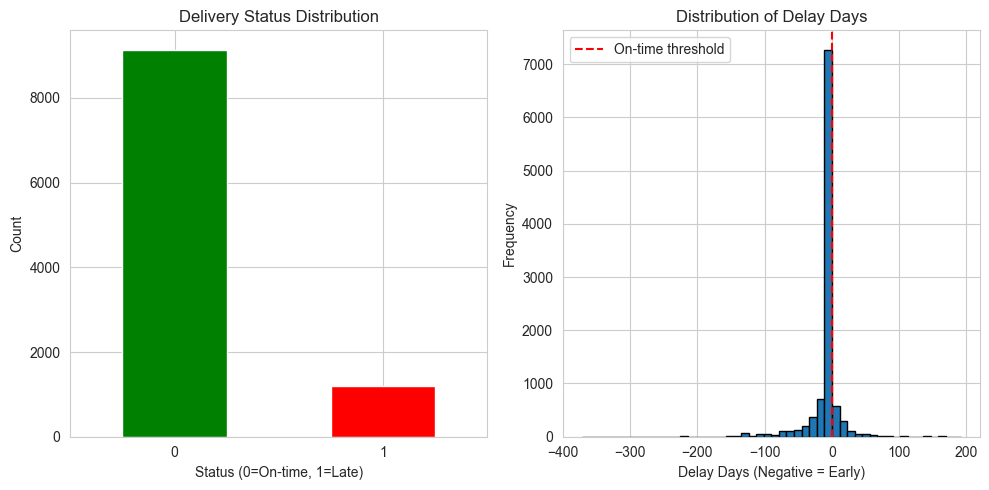

In [26]:
# Check class balance
print("Target Variable Distribution:")
print("="*50)
print(df['is_late'].value_counts())
print("\nPercentages:")
print(df['is_late'].value_counts(normalize=True) * 100)

# Visualize class balance
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['is_late'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Delivery Status Distribution')
plt.xlabel('Status (0=On-time, 1=Late)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['delay_days'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Delay Days')
plt.xlabel('Delay Days (Negative = Early)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='On-time threshold')
plt.legend()

plt.tight_layout()
plt.show()

## 3. Data Quality Assessment

In [27]:
# Data types overview
print("Data Types:")
print("="*50)
print(df.dtypes.value_counts())
print("\nColumn Data Types:")
df.dtypes

Data Types:
object            21
int64              5
datetime64[ns]     5
float64            4
Name: count, dtype: int64

Column Data Types:


ID                                       int64
Project Code                            object
PQ #                                    object
PO / SO #                               object
ASN/DN #                                object
Country                                 object
Managed By                              object
Fulfill Via                             object
Vendor INCO Term                        object
Shipment Mode                           object
PQ First Sent to Client Date    datetime64[ns]
PO Sent to Vendor Date          datetime64[ns]
Scheduled Delivery Date         datetime64[ns]
Delivered to Client Date        datetime64[ns]
Delivery Recorded Date          datetime64[ns]
Product Group                           object
Sub Classification                      object
Vendor                                  object
Item Description                        object
Molecule/Test Type                      object
Brand                                   object
Dosage       

Missing Values Summary:
                                                    Column  Missing_Count  \
PO Sent to Vendor Date              PO Sent to Vendor Date           5732   
PQ First Sent to Client Date  PQ First Sent to Client Date           2681   
Dosage                                              Dosage           1736   
Shipment Mode                                Shipment Mode            360   
Line Item Insurance (USD)        Line Item Insurance (USD)            287   

                              Missing_Percentage  
PO Sent to Vendor Date                     55.52  
PQ First Sent to Client Date               25.97  
Dosage                                     16.82  
Shipment Mode                               3.49  
Line Item Insurance (USD)                   2.78  


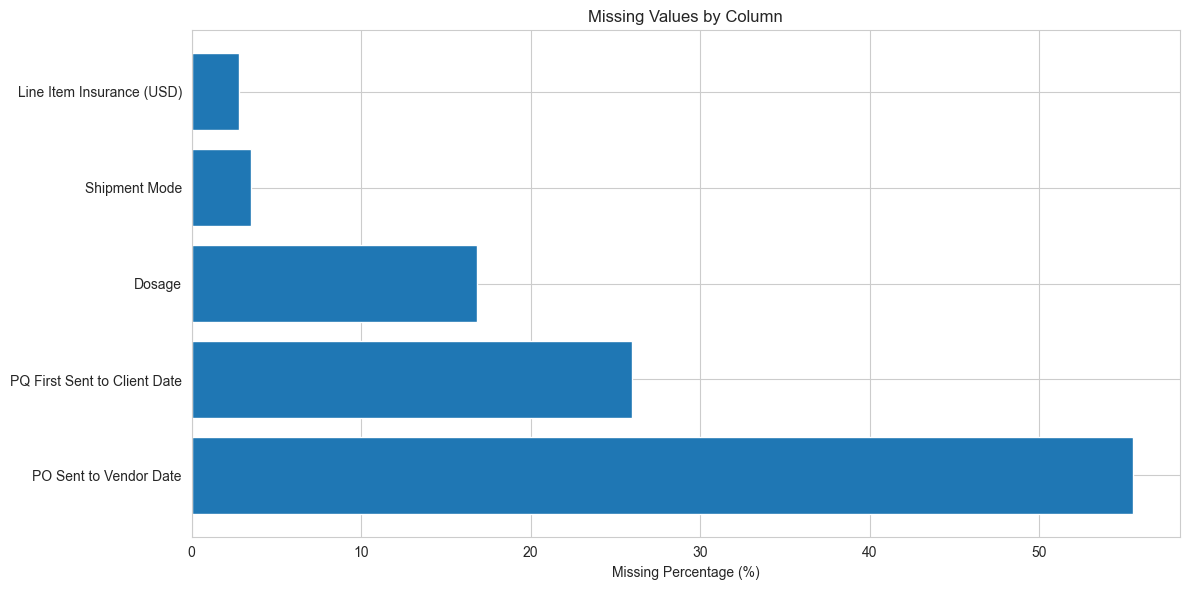

In [28]:
# Missing values analysis
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

# Filter columns with missing values
missing_data = missing_data[missing_data['Missing_Count'] > 0]

print("Missing Values Summary:")
print("="*50)
print(missing_data)

# Visualze missing values (minor typo in comment)
if len(missing_data) > 0:
    plt.figure(figsize=(12, 6))
    plt.barh(missing_data['Column'], missing_data['Missing_Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo missing values found!")

In [42]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Check for duplicate IDs
if 'ID' in df.columns:
    duplicate_ids = df['ID'].duplicated().sum()
    print(f"Duplicate IDs: {duplicate_ids}")

# Check for duplicate PO/SO numbers
if 'PO / SO #' in df.columns:
    duplicate_pos = df['PO / SO #'].duplicated().sum()
    print(f"Duplicate PO/SO numbers: {duplicate_pos}")

Duplicate rows: 0
Duplicate IDs: 0
Duplicate PO/SO numbers: 4091


## 4. Numerical Variables Analysis

In [43]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns ({len(numerical_cols)}):")
print(numerical_cols)

Numerical columns (9):
['ID', 'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'Line Item Insurance (USD)', 'delay_days', 'is_late']


In [44]:
# Outlier detection using IQR method
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Check key numerical columns for outliers (delay_days not created yet, so exclude it)
outlier_cols = ['Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Value']
outlier_cols = [col for col in outlier_cols if col in df.columns]

print("Outlier Analysis:")
print("="*80)
for col in outlier_cols:
    outlier_count, lower, upper = detect_outliers(df, col)
    print(f"{col}:")
    print(f"  Outliers: {outlier_count} ({outlier_count/len(df)*100:.2f}%)")
    print(f"  Bounds: [{lower:.2f}, {upper:.2f}]")
    print()

Outlier Analysis:


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [45]:
# Outlier detection using IQR method
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Check key numerical columns for outliers
outlier_cols = ['Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Value', 'delay_days']
outlier_cols = [col for col in outlier_cols if col in df.columns]

print("Outlier Analysis:")
print("="*80)
for col in outlier_cols:
    outlier_count, lower, upper = detect_outliers(df, col)
    print(f"{col}:")
    print(f"  Outliers: {outlier_count} ({outlier_count/len(df)*100:.2f}%)")
    print(f"  Bounds: [{lower:.2f}, {upper:.2f}]")
    print()

Outlier Analysis:


TypeError: unsupported operand type(s) for -: 'str' and 'str'

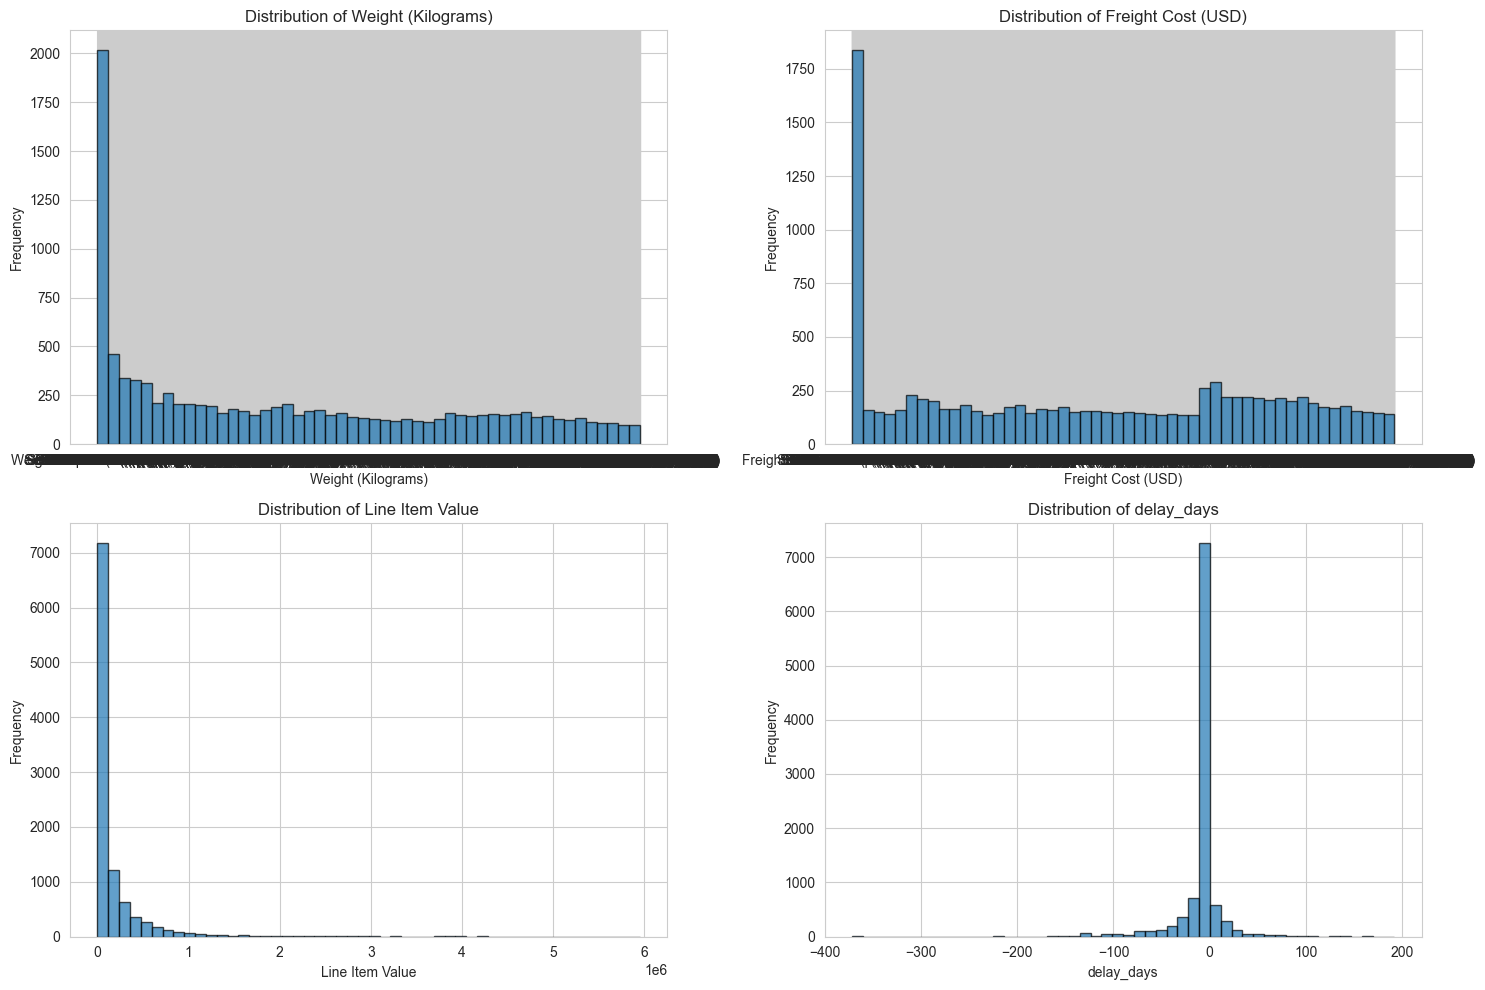

In [34]:
# Visualize distributions of key numerical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

key_numeric_cols = ['Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Value', 'delay_days']
key_numeric_cols = [col for col in key_numeric_cols if col in df.columns]

for idx, col in enumerate(key_numeric_cols[:4]):
    row = idx // 2
    col_idx = idx % 2
    
    axes[row, col_idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')
 
plt.tight_layout()
plt.show()

## 5. Categorical Variables Analysis

In [35]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns ({len(categorical_cols)}):")
print(categorical_cols)

Categorical columns (21):
['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode', 'Product Group', 'Sub Classification', 'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form', 'Manufacturing Site', 'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)']


In [36]:
# Cardinality analysis
cardinality_df = pd.DataFrame({
    'Column': categorical_cols,
    'Unique_Values': [df[col].nunique() for col in categorical_cols],
    'Sample_Values': [df[col].value_counts().head(3).to_dict() for col in categorical_cols]
}).sort_values('Unique_Values', ascending=False)

print("Cardinality Analysis:")
print("="*80)
cardinality_df

Cardinality Analysis:


,Column,Unique_Values,Sample_Values
3,ASN/DN #,7030,"{'ASN-19166': 54, 'ASN-24415': 38, 'ASN-23875'..."
20,Freight Cost (USD),6733,"{'Freight Included in Commodity Cost': 1442, '..."
2,PO / SO #,6233,"{'SCMS-199289': 67, 'SCMS-199283': 63, 'SCMS-1..."
19,Weight (Kilograms),4688,"{'Weight Captured Separately': 1507, '2': 29, ..."
1,PQ #,1237,"{'Pre-PQ Process': 2681, 'FPQ-14942': 205, 'FP..."
12,Item Description,184,"{'Efavirenz 600mg, tablets, 30 Tabs': 755, 'Ne..."
0,Project Code,142,"{'116-ZA-T30': 768, '104-CI-T30': 729, '151-NG..."
17,Manufacturing Site,88,"{'Aurobindo Unit III, India': 3172, 'Mylan (fo..."
13,Molecule/Test Type,86,"{'Efavirenz': 1125, 'Nevirapine': 877, 'Lamivu..."
11,Vendor,73,"{'SCMS from RDC': 5404, 'Orgenics, Ltd': 754, ..."


In [37]:
# Analyze key categorical variables
key_cat_cols = ['Country', 'Shipment Mode', 'Vendor', 'Product Group', 'Dosage Form']
key_cat_cols = [col for col in key_cat_cols if col in df.columns]

for col in key_cat_cols[:3]:  # Show first 3
    print(f"\n{col} - Top 10 values:")
    print("="*50)
    print(df[col].value_counts().head(10))


Country - Top 10 values:
Country
South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Name: count, dtype: int64

Shipment Mode - Top 10 values:
Shipment Mode
Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: count, dtype: int64

Vendor - Top 10 values:
Vendor
SCMS from RDC                                            5404
Orgenics, Ltd                                             754
S. BUYS WHOLESALER                                        715
Aurobindo Pharma Limited                                  668
Trinity Biotech, Plc                                      356
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)           347
PHARMACY DIRECT                                           326
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)     317
HETERO LABS LIMITED                     

## 6. Business Insights & Exploratory Analysis

Delay Rate by Country (Top 15):
               Late_Count  Total_Shipments  Delay_Rate  Avg_Delay_Days
Country                                                               
Burundi                38               98        0.39           -8.45
Congo, DRC             83              333        0.25           11.24
Benin                   3               13        0.23            2.38
Mozambique            116              631        0.18           -1.21
Zambia                108              683        0.16           -5.23
Ghana                   8               58        0.14           -0.22
Zimbabwe               77              538        0.14          -11.01
Kenya                  14              111        0.13            0.89
Tanzania               66              519        0.13           -4.39
South Sudan            21              164        0.13           -1.07
Guatemala               2               15        0.13           -1.00
Uganda                 98              779   

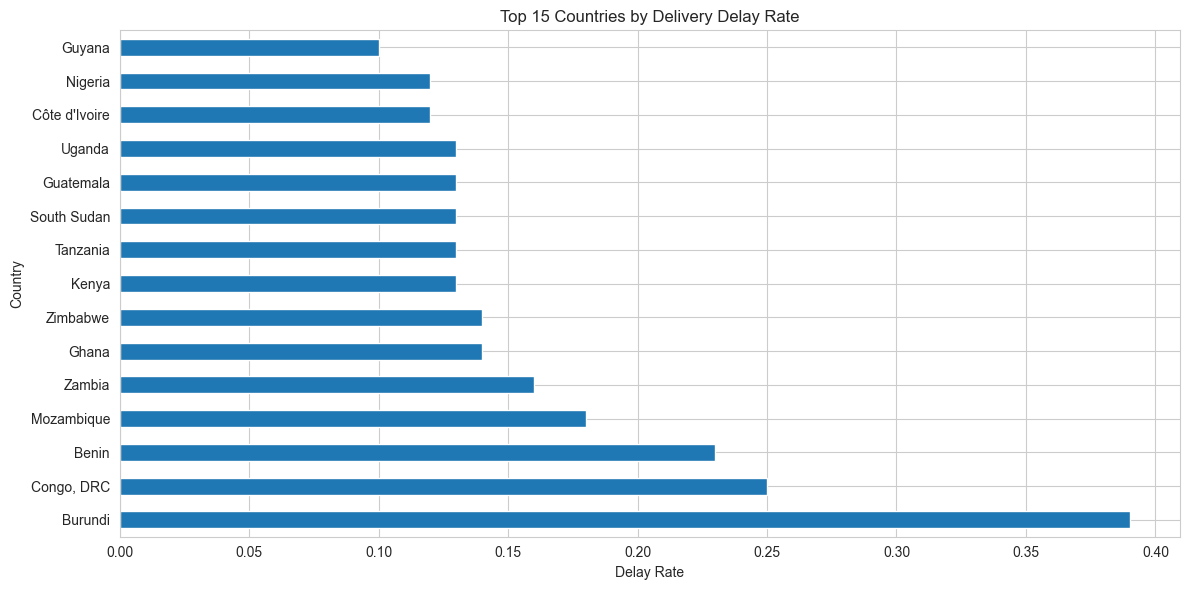

In [38]:
# Question 1: Which countries have the highest delay rates?
if 'Country' in df.columns:
    country_delays = df.groupby('Country').agg({
        'is_late': ['sum', 'count', 'mean'],
        'delay_days': 'mean'
    }).round(2)
    
    country_delays.columns = ['Late_Count', 'Total_Shipments', 'Delay_Rate', 'Avg_Delay_Days']
    country_delays = country_delays[country_delays['Total_Shipments'] >= 10]  # Filter for significance
    country_delays = country_delays.sort_values('Delay_Rate', ascending=False)
    
    print("Delay Rate by Country (Top 15):")
    print("="*80)
    print(country_delays.head(15))
    
    # Visualize
    plt.figure(figsize=(12, 6))
    country_delays.head(15)['Delay_Rate'].plot(kind='barh')
    plt.xlabel('Delay Rate')
    plt.title('Top 15 Countries by Delivery Delay Rate')
    plt.tight_layout()
    plt.show()

In [46]:
# Question 2: Which shipment modes are riskiest?
if 'Shipment Mode' in df.columns:
    mode_analysis = df.groupby('Shipment Mode').agg({
        'is_late': ['sum', 'count', 'mean'],
        'delay_days': 'mean',
        'Freight Cost (USD)': 'mean' if 'Freight Cost (USD)' in df.columns else 'count'
    }).round(2)
    
    print("\nShipment Mode Analysis:")
    print("="*80)
    print(mode_analysis)
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Delay rate by mode
    mode_delay_rate = df.groupby('Shipment Mode')['is_late'].mean().sort_values(ascending=False)
    axes[0].bar(mode_delay_rate.index, mode_delay_rate.values)
    axes[0].set_title('Delay Rate by Shipment Mode')
    axes[0].set_ylabel('Delay Rate')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Average delay days by mode
    mode_avg_delay = df.groupby('Shipment Mode')['delay_days'].mean().sort_values(ascending=False)
    axes[1].bar(mode_avg_delay.index, mode_avg_delay.values, color='coral')
    axes[1].set_title('Average Delay Days by Shipment Mode')
    axes[1].set_ylabel('Average Delay Days')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

TypeError: agg function failed [how->mean,dtype->object]

In [47]:
# Question 3: Which vendors are most/least reliable?
if 'Vendor' in df.columns:
    vendor_performance = df.groupby('Vendor').agg({
        'is_late': ['sum', 'count', 'mean'],
        'delay_days': 'mean'
    }).round(2)
    
    vendor_performance.columns = ['Late_Count', 'Total_Shipments', 'Delay_Rate', 'Avg_Delay_Days']
    vendor_performance = vendor_performance[vendor_performance['Total_Shipments'] >= 20]  # Significance filter
    
    print("\nMost Reliable Vendors (Lowest Delay Rate, min 20 shipments):")
    print("="*80)
    print(vendor_performance.sort_values('Delay_Rate').head(10))
    
    print("\nLeast Reliable Vendors (Highest Delay Rate, min 20 shipments):")
    print("="*80)
    print(vendor_performance.sort_values('Delay_Rate', ascending=False).head(10))


Most Reliable Vendors (Lowest Delay Rate, min 20 shipments):
                                                    Late_Count  \
Vendor                                                           
BRISTOL-MYERS SQUIBB                                         0   
MICRO LABS LIMITED                                           0   
Hoffmann-La Roche ltd Basel                                  0   
GLAXOSMITHKLINE EXPORT LIMITED                               0   
Trinity Biotech, Plc                                         1   
PHARMACY DIRECT                                              0   
HETERO LABS LIMITED                                          2   
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)              4   
MERCK SHARP & DOHME IDEA GMBH (FORMALLY MERCK S...           1   
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORAT...           2   

                                                    Total_Shipments  \
Vendor                                                                
BRI

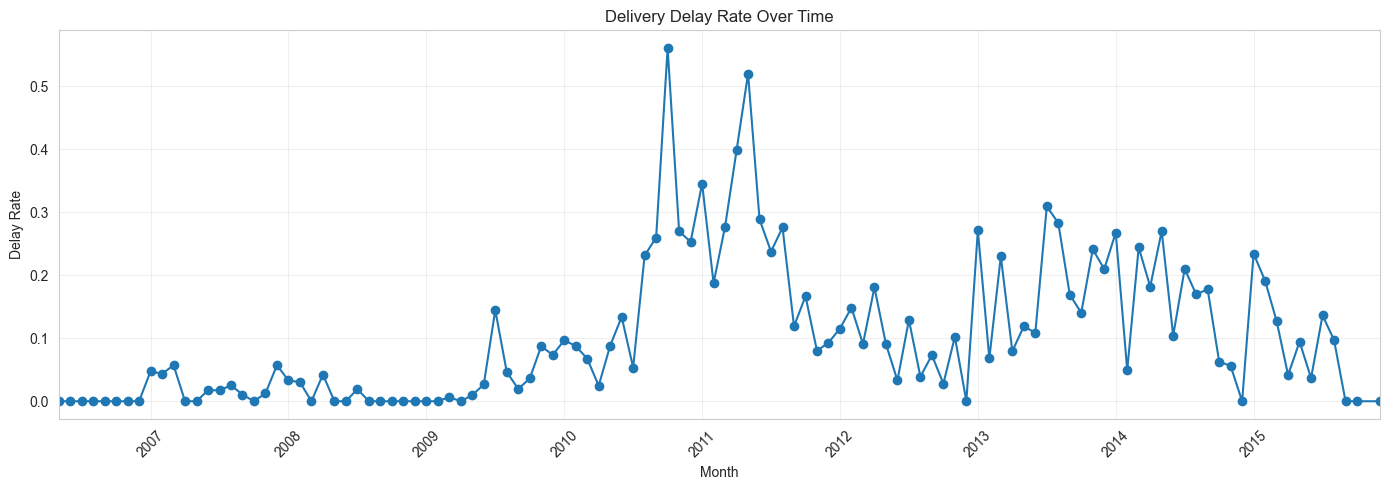

In [48]:
# Temporal analysis: Delays over time
if 'Scheduled Delivery Date' in df.columns:
    # Extract month and year
    df['delivery_year_month'] = df['Scheduled Delivery Date'].dt.to_period('M')
    
    # Calculate delay rate by month
    monthly_delay_rate = df.groupby('delivery_year_month')['is_late'].mean()
    
    plt.figure(figsize=(14, 5))
    monthly_delay_rate.plot(kind='line', marker='o')
    plt.title('Delivery Delay Rate Over Time')
    plt.ylabel('Delay Rate')
    plt.xlabel('Month')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## 7. Correlation Analysis

In [49]:
# Correlation matrix for numerical variables
corr_cols = ['Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Value', 'delay_days', 'is_late']
corr_cols = [col for col in corr_cols if col in df.columns]

correlation_matrix = df[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Key Numerical Variables')
plt.tight_layout()
plt.show()

ValueError: could not convert string to float: 'See ASN-93 (ID#:1281)'

## 8. Summary & Key Findings

In [50]:
print("="*80)
print("SUMMARY - EDA & DATA QUALITY ANALYSIS")
print("="*80)

print(f"\n1. Dataset Overview:")
print(f"   - Total records: {len(df):,}")
print(f"   - Total features: {df.shape[1]}")
print(f"   - Numerical features: {len(numerical_cols)}")
print(f"   - Categorical features: {len(categorical_cols)}")

print(f"\n2. Target Variable (is_late):")
late_pct = (df['is_late'].sum() / len(df) * 100)
print(f"   - Late deliveries: {df['is_late'].sum():,} ({late_pct:.2f}%)")
print(f"   - On-time deliveries: {(len(df) - df['is_late'].sum()):,} ({100-late_pct:.2f}%)")
print(f"   - Average delay: {df['delay_days'].mean():.2f} days")

print(f"\n3. Data Quality Issues:")
print(f"   - Missing values: {df.isnull().sum().sum():,} total")
print(f"   - Duplicate rows: {df.duplicated().sum()}")

print(f"\n4. Key Insights:")
if 'Country' in df.columns:
    worst_country = country_delays['Delay_Rate'].idxmax()
    print(f"   - Highest delay rate country: {worst_country} ({country_delays.loc[worst_country, 'Delay_Rate']:.2%})")

if 'Shipment Mode' in df.columns:
    riskiest_mode = df.groupby('Shipment Mode')['is_late'].mean().idxmax()
    print(f"   - Riskiest shipment mode: {riskiest_mode}")

print("\n5. Next Steps:")
print("   - Move to SQL data processing (Notebook 2)")
print("   - Handle missing values strategically")
print("   - Create features from insights discovered")
print("="*80)

SUMMARY - EDA & DATA QUALITY ANALYSIS

1. Dataset Overview:
   - Total records: 10,324
   - Total features: 36
   - Numerical features: 9
   - Categorical features: 21

2. Target Variable (is_late):
   - Late deliveries: 1,186 (11.49%)
   - On-time deliveries: 9,138 (88.51%)
   - Average delay: -6.02 days

3. Data Quality Issues:
   - Missing values: 10,796 total
   - Duplicate rows: 0

4. Key Insights:
   - Highest delay rate country: Burundi (39.00%)
   - Riskiest shipment mode: Ocean

5. Next Steps:
   - Move to SQL data processing (Notebook 2)
   - Handle missing values strategically
   - Create features from insights discovered


In [51]:
# Save cleaned data for next notebook
df.to_csv('../data/interim/01_eda_output.csv', index=False)
print("Data saved to data/interim/01_eda_output.csv")

Data saved to data/interim/01_eda_output.csv
